# TP1 - Visión por computadora 1

Integrantes:
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)

## Parte 1

Con las imágenes en `/white_patch` y `/coord_cromaticas`:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from utils.utils import load_image, plot_images, plot_images_comparison, change_rgb2hsv

### Coordenadas cromáticas

A continuación se muestra el código que implementa el algoritmo de pasaje a coordenadas cromáticas y se muestra el resultado obtenido sobre las imágenes de la carpeta `/coord_cromaticas`.

In [2]:
Images_Original = [load_image(f'enunciado/coord_cromaticas/CoordCrom_{x}.png') for x in range(1,4)]

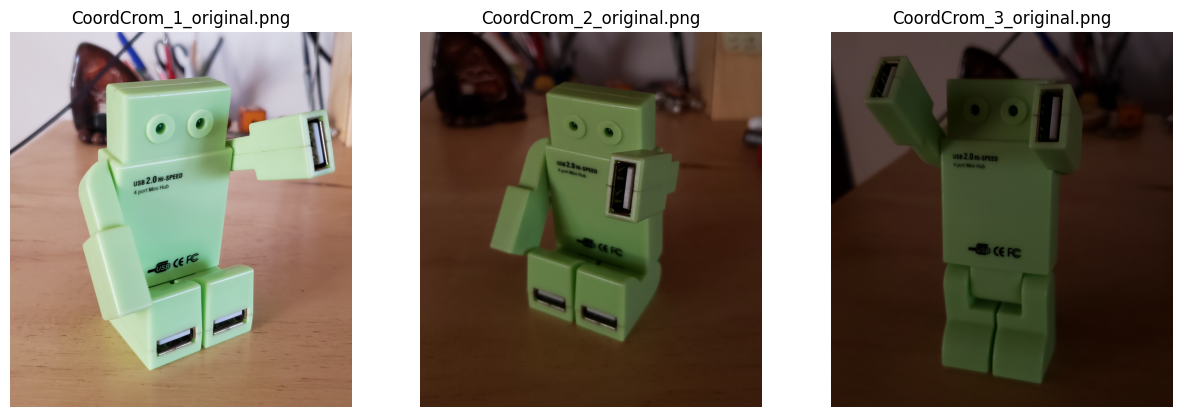

In [3]:
# Visualizo la imagenes originales
original_titles = [f'CoordCrom_{i+1}_original.png' for i in range(len(Images_Original))]
plot_images(images=Images_Original, titles=original_titles)

In [4]:
def get_coord_cromaticas(image: np.ndarray) -> np.ndarray:
    """
    Función que calcula las coordenadas cromáticas de una imagen.

    Parameters
    ----------
    image : numpy array
        Imagen de entrada.
    
    Returns
    -------
    coord_cromaticas : numpy array
        Coordenadas cromáticas de la imagen.
    """

    # se pasan los valores a float para mayor precisión
    image = image.astype(np.float32)
    
    # se calcula la suma de los canales R, G, B en cada pixel
    suma = np.sum(image, axis=-1, keepdims=True)
    
    # se previene la división por cero
    suma[suma == 0] = 1
    
    # se obtienen las coordenadas cromáticas dividiendo cada canal por la suma total
    coord_cromaticas = image / suma
    
    return coord_cromaticas

In [5]:
Images_CoordCrom =  [get_coord_cromaticas(image) for image in Images_Original]

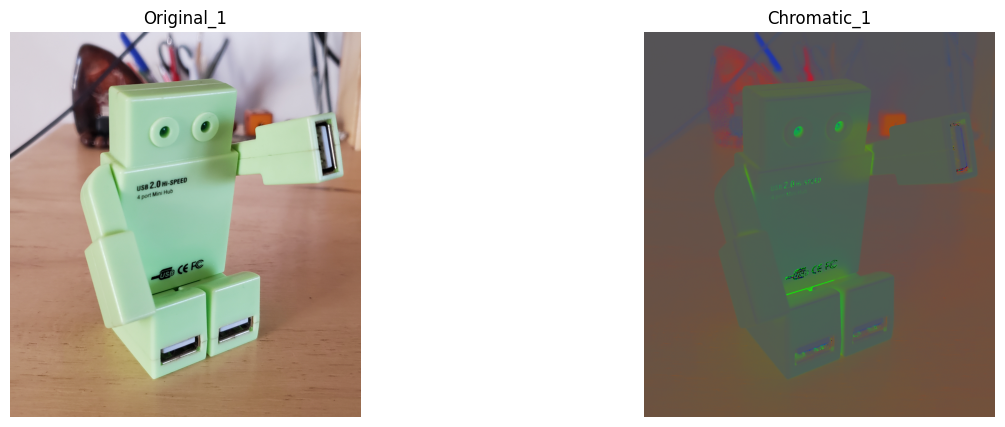

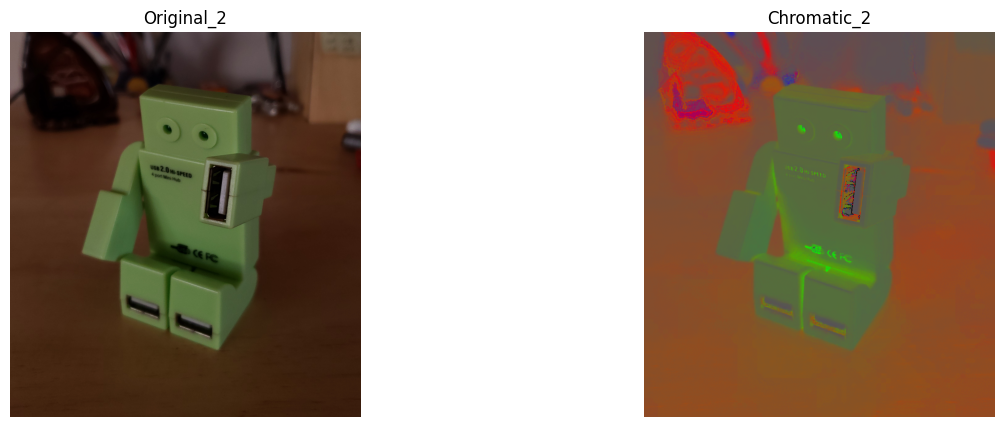

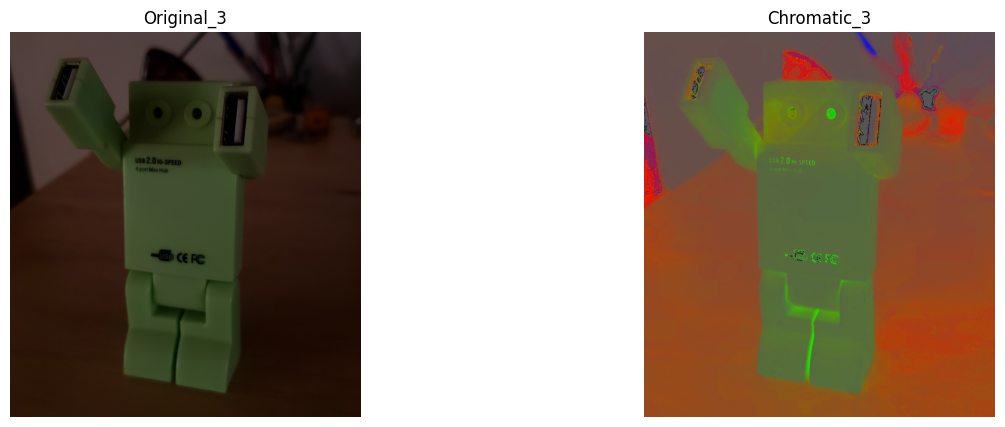

In [6]:
# Ploteo las imagenes en coordenadas cromaticas
chromatic_titles = [f'CoordCrom_{i+1}_cromatica.png' for i in range(len(Images_Original))]
plot_images_comparison(original_images=Images_Original, modified_images=Images_CoordCrom)

### White Patch

A continuación se muestra el código que implementa el algoritmo White Patch y se muestra el resultado obtenido sobre las imágenes de la carpeta `/white_patch`. Además, se analizan las posibles fallas en el caso de White Patch.

In [7]:
Paths_test_Original= ['test_blue', 'test_green', 'test_red']
Images_test_Original = [load_image(f'enunciado/white_patch/{x}.png') for x in Paths_test_Original]

Paths_wp_Original = ['wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']
Images_wp_Original = [load_image(f'enunciado/white_patch/{x}') for x in Paths_wp_Original]


In [8]:
def white_patch_max(image):
    # Se castean los valores de los tres canales a float para permitir cálculos con mayor precisión
    image = image.astype(np.float32)
    
    # Se calcula el máximo para cada canal (R, G y B)
    max_rgb = np.max(image, axis=(0, 1))

    corrected_image = (image / max_rgb) * 255.0
    corrected_image = np.minimum(corrected_image, 255.0)
    
    return corrected_image.astype(np.uint8)

In [9]:
def white_patch_percentile(image: np.ndarray, percentil = 95) -> np.ndarray:
    """
    Parameters
    ----------
    img_entrada:np.ndarray 
        Imagen de entrada
    percentil: Percentil a utilizar en cada canal RGB cuando los tres sean 255
    
    Return
    ------
    img: (numpy.ndarray) imagen con ajuste de White Patch
    """
    # Se castean los valores de los tres canales a float para permitir cálculos con mayor precisión
    image = image.astype(np.float32)
    
    # Se calcula el máximo para cada canal (R, G y B)
    max_rgb = np.max(image, axis=(0, 1))

    if np.allclose(max_rgb, [255., 255., 255.], rtol=0, atol=20):
        max_rgb = np.array([np.percentile(image[:, :, i], percentil) for i in range(3)])

    corrected_image = (image / max_rgb) * 255.0
    corrected_image = np.minimum(corrected_image, 255.0)

    # Se vuelven a convertir los valores a enteros
    corrected_image = corrected_image.astype(np.uint8)
    
    return corrected_image

In [10]:
Images_test_WhiteP_percentile = [white_patch_percentile(image) for image in Images_test_Original]
Images_wp_WhiteP_percentile = [white_patch_percentile(image) for image in Images_wp_Original]
Images_test_WhiteP_max = [white_patch_max(image) for image in Images_test_Original]
Images_wp_WhiteP_max = [white_patch_max(image) for image in Images_wp_Original]

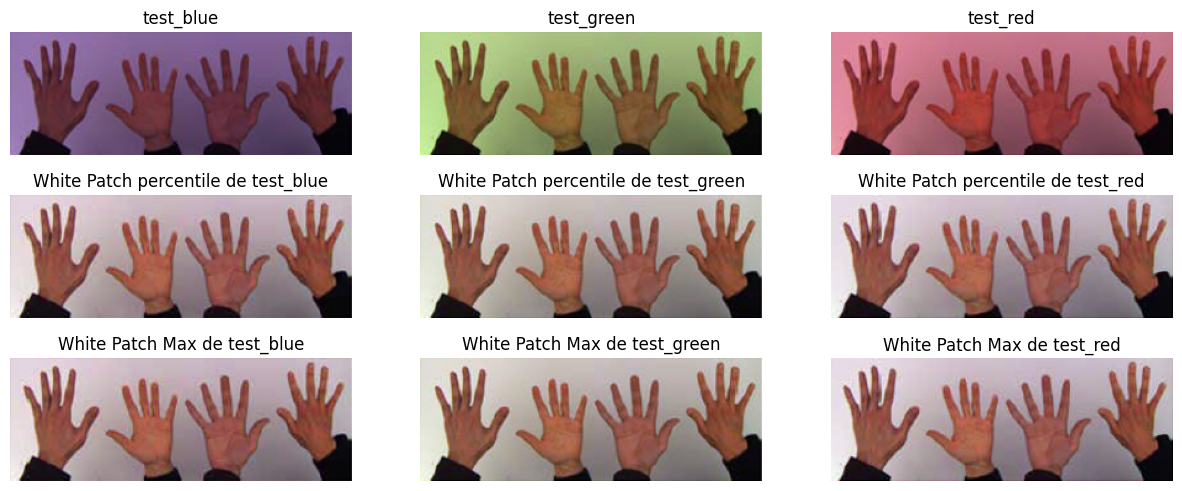

In [11]:
# graficar la comparación entre las originales y las imagenes a las que se aplico white-patch
fig, axs = plt.subplots(3, 3, figsize=(15, 6))
for i in range(3):
    axs[0, i].imshow(Images_test_Original[i])
    axs[0, i].set_title(f'{Paths_test_Original[i]}')
    axs[0, i].axis('off')

    axs[1, i].imshow(Images_test_WhiteP_percentile[i])
    axs[1, i].set_title(f'White Patch percentile de {Paths_test_Original[i]}')
    axs[1, i].axis('off')

    axs[2, i].imshow(Images_test_WhiteP_max[i])
    axs[2, i].set_title(f'White Patch Max de {Paths_test_Original[i]}')
    axs[2, i].axis('off')

plt.show()

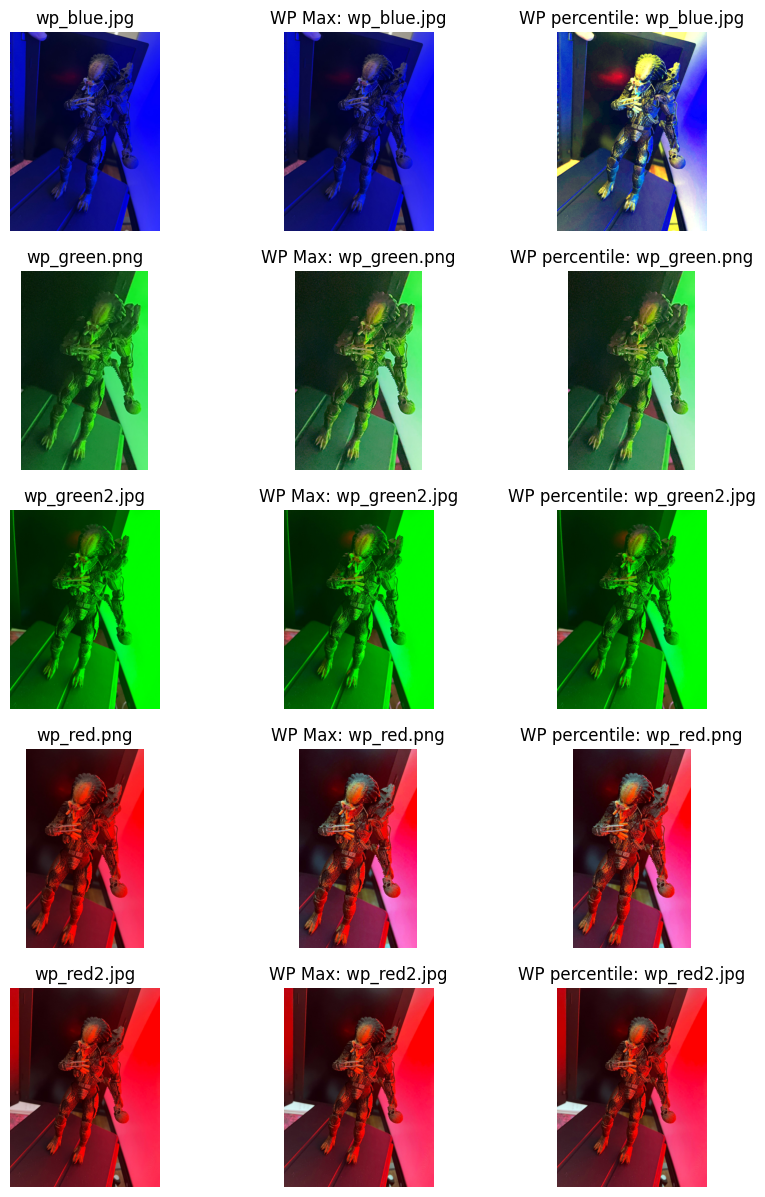

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    axs[i, 0].imshow(Images_wp_Original[i])
    axs[i, 0].set_title(f'{Paths_wp_Original[i]}')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(Images_wp_WhiteP_max[i])
    axs[i, 1].set_title(f'WP Max: {Paths_wp_Original[i]}')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(Images_wp_WhiteP_percentile[i])
    axs[i, 2].set_title(f'WP percentile: {Paths_wp_Original[i]}')
    axs[i, 2].axis('off')    
plt.show()

### Resultados obtenidos y análisis de posibles fallas:

El algoritmo de "White-Patch" es un método de equilibrio de color que busca corregir los matices de color en una imagen ajustando los canales de color para que los píxeles más brillantes se vuelvan blancos. Sin embargo, nuestros experimentos han revelado algunos pros y contras significativos del método.

Dicho esto y en función de nuestros experimentos anteriores, podemos notar que:

Pros:
 - El algoritmo es fácil de implementar y entender.
 - Es rápido en su ejecución
 - Funciona bien cuando la iluminación es uniforme y la imagen tiene un buen balance de luz.

Contras:
 - Dependencia de la iluminación: su eficacia disminuye considerablemente cuando la iluminación es desigual en la imagen, como vimos en nuestros experimentos. Las áreas con diferentes niveles de luz crean matices y niveles de brillo inconsistentes.
 - Limitación en áreas variadas de iluminación: El algoritmo no puede ajustarse selectivamente a diferentes zonas de iluminación dentro de la misma imagen, lo que limita su capacidad para corregir imágenes con iluminación compleja.

En nuestros experimentos, al aplicar el algoritmo con un percentil del 100% (análogo a calcular el máximo), no obtuvimos una mejora significativa en comparación con la imagen original. Esto se debe a que el algoritmo asumió que los píxeles más brillantes ya estaban en [255, 255, 255] no aplicando ningún cambio sobre la imagen. Al bajar el percentil, logramos algo de corrección de color en partes selectivas de las imágenes, pero se corre el riesgo de obtener rápidamente una imagen sobreexpuesta lo que deja en manifiesto para nuestro caso que tener una iluminación desigual afecta la performance de este algoritmo.

Finalmente si realizamos un análisis entre las imágenes `test` y `wp` vemos como para las primeras (test) al ser la fuente de iluminación constante el algoritmo performó mejor, obteniendo colores más reales.

------

## Parte 2

1. Para las imágenes `img1_tp.png` y `img2_tp.png` leerlas con OpenCV en escala de grises y visualizarlas.

2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre sí. 
¿Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como *features* a los histogramas?

3. Para la imagen segmentacion.png analicé el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascarás, las regiones en imágenes 
separadas.


In [13]:
# cargar imagenes en escala de grises
Images_Gray = []
Paths_Gray = ['img1_tp.png', 'img2_tp.png']

for path in Paths_Gray:
    Images_Gray.append(cv.imread(f'enunciado/{path}', cv.IMREAD_GRAYSCALE))

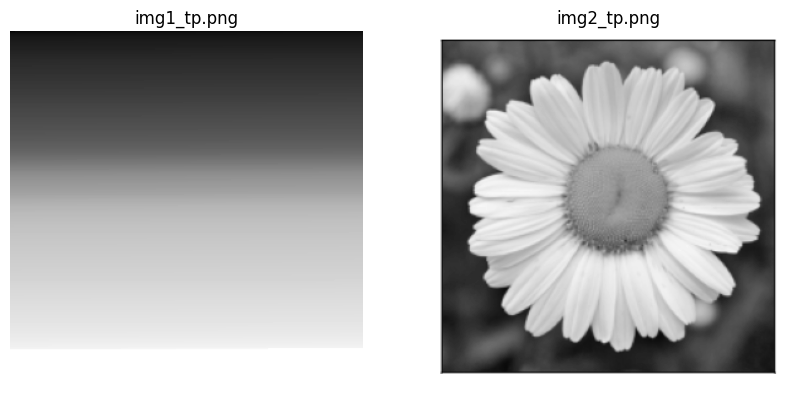

In [14]:
# graficar las imágenes en escala de grises
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    axs[i].imshow(Images_Gray[i], cmap='gray')
    axs[i].set_title(f'{Paths_Gray[i]}')
    axs[i].axis('off')

plt.show()

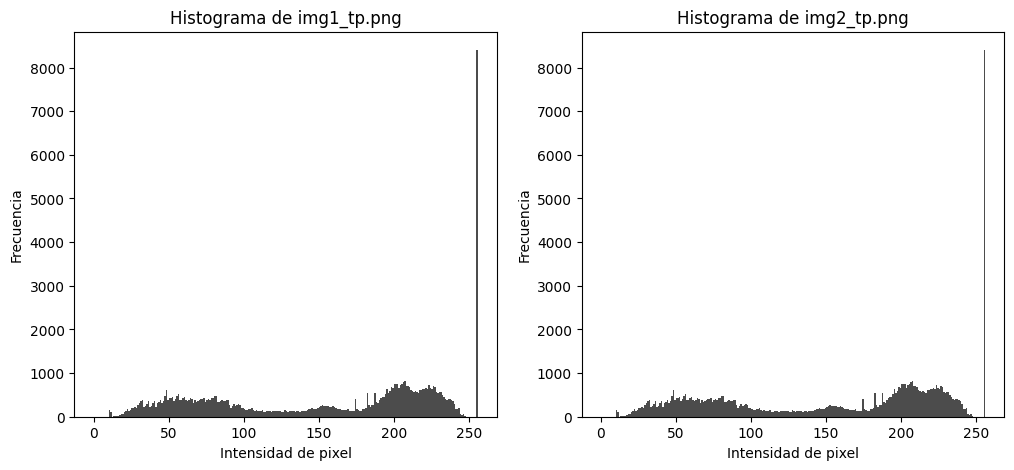

In [15]:
# graficar los histogramas de las imágenes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i in range(2):
    axs[i].hist(Images_Gray[i].ravel(), bins=256, range=[0, 256], color='k', alpha=0.7)
    axs[i].set_title(f'Histograma de {Paths_Gray[i]}')
    axs[i].set_xlabel('Intensidad de pixel')
    axs[i].set_ylabel('Frecuencia')

plt.show()

### Pregunta:

- Explicar lo que se observa. 
    - Si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como *features* a los histogramas?


1. Explicar lo que se observa:

En nuestro experimento construimos el histograma para las dos imágenes propuestas que están en escala de grises, donde una muestra un degradado y otra que muestra una flor. A partir de los histogramas de ambas imágenes, vemos que estos son muy similares (si no idénticos). Esto muestra una característica importante de los histogramas, que es que capturan la distribución de los niveles de intensidad de los pixeles en la imagen, pero no capturan la información espacial o la estructura de la imagen. Por lo tanto, dos imágenes con la misma distribución de niveles de gris, pero con contenido visual completamente diferente, pueden tener histogramas muy similares.

2. Si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como *features* a los histogramas?:

Aunque los histogramas sean fáciles de calcular y tengan cierta robustez a transformaciones como rotación o traslación de imágenes, para el caso de un modelo de clasificación/detección donde la estructura de la imagen es crucial esta información no es relevante. Esto podemos verlo del análisis de las imágenes anteriores donde ambos histogramas son similares, pero la imagen en sí son completamente diferentes.

------

3. Para la imagen `segmentacion.png` analicé el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascarás, las regiones en imágenes 
separadas.

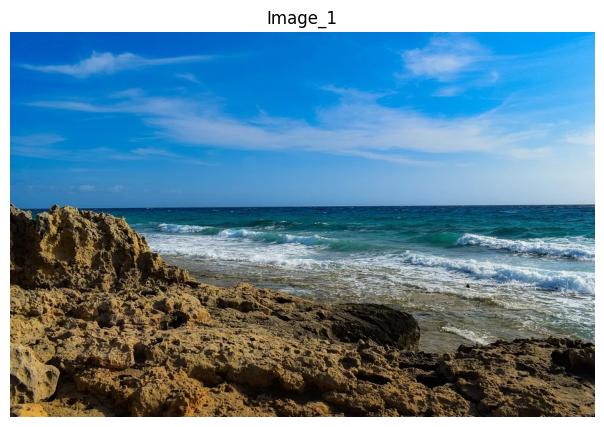

In [16]:
Imagen_a_segmentar = [load_image('enunciado/segmentacion.png')]

plot_images(Imagen_a_segmentar)

#### Segmentación del suelo

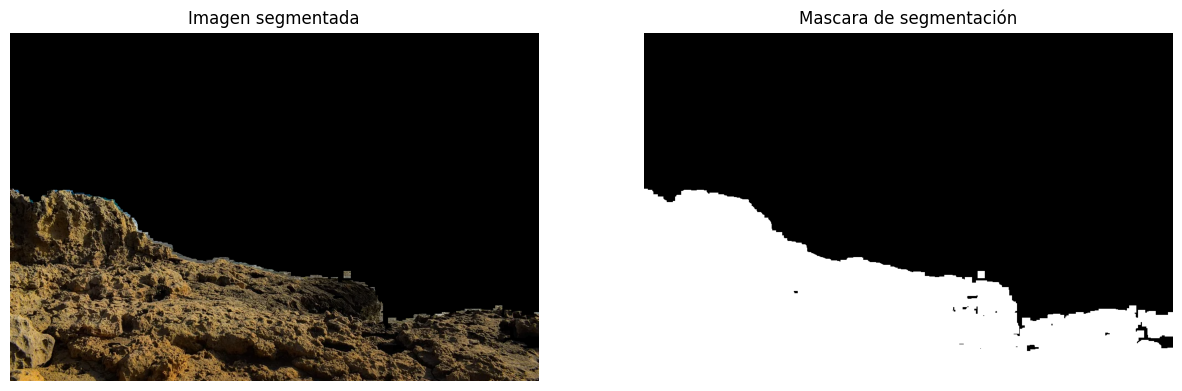

In [17]:
# aplicar filtro por color a imagen hsv para segmentar la región de interés, graficar la imagen segmentada
image_hsv = change_rgb2hsv(Imagen_a_segmentar[0])

# se aplica la máscara para el color deseado
mask = cv.inRange(image_hsv, (0, 50, 0), (22, 255, 255))

# filtrar blancos aislados
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

# dilatar la máscara para unir regiones
mask = cv.dilate(mask, kernel, iterations=2)

segmentada = cv.bitwise_and(Imagen_a_segmentar[0], Imagen_a_segmentar[0], mask=mask)

plot_images([segmentada, cv.cvtColor(mask, cv.COLOR_GRAY2RGB)], ["Imagen segmentada", "Mascara de segmentación"])

mask_tierra = mask.copy()

#### Segmentación del cielo

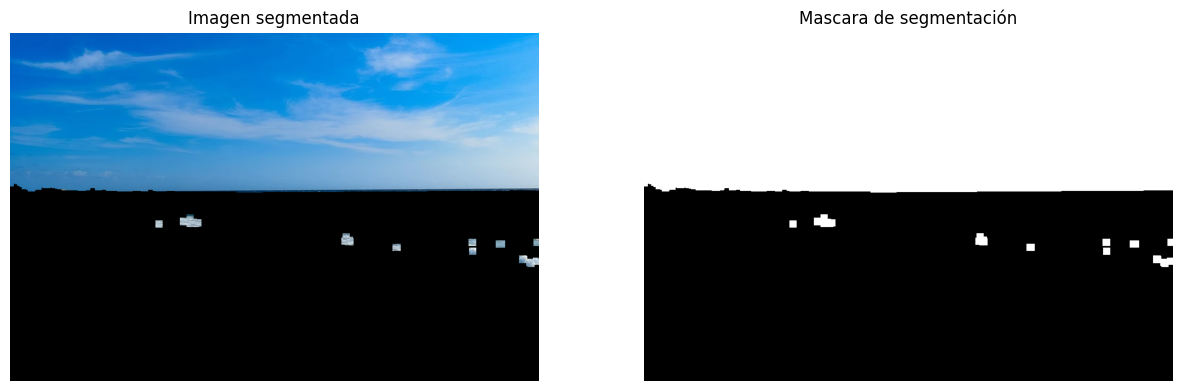

In [18]:
# aplicar filtro por color a imagen hsv para segmentar la región de interés, graficar la imagen segmentada
image_hsv = change_rgb2hsv(Imagen_a_segmentar[0])

# se aplica la máscara para el color deseado
mask = cv.inRange(image_hsv, (100, 33, 177), (110, 255, 255))

# filtrar blancos aislados
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

# dilatar la máscara para unir regiones
mask = cv.dilate(mask, kernel, iterations=2)

segmentada = cv.bitwise_and(Imagen_a_segmentar[0], Imagen_a_segmentar[0], mask=mask)

plot_images([segmentada, cv.cvtColor(mask, cv.COLOR_GRAY2RGB)], ["Imagen segmentada", "Mascara de segmentación"])

mask_cielo = mask.copy()

#### Segmentación del agua

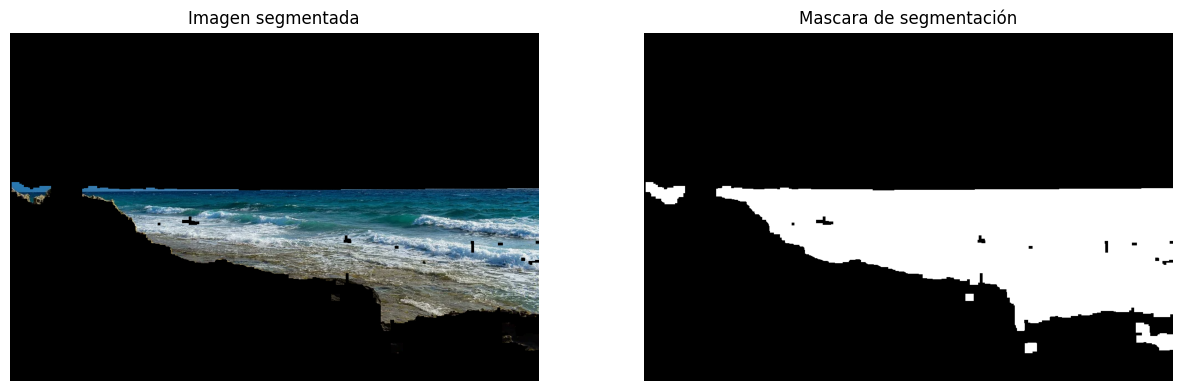

In [19]:
# aplicar un and entre las mascaras de tierra y cielo
mask_mar = cv.bitwise_not(cv.bitwise_or(mask_tierra, mask_cielo))

# filtrar blancos aislados
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
mask_mar = cv.morphologyEx(mask_mar, cv.MORPH_OPEN, kernel)

# dilatar la máscara para unir regiones
mask_mar = cv.dilate(mask_mar, kernel, iterations=2)

segmentada = cv.bitwise_and(Imagen_a_segmentar[0], Imagen_a_segmentar[0], mask=mask_mar)

plot_images([segmentada, cv.cvtColor(mask_mar, cv.COLOR_GRAY2RGB)], ["Imagen segmentada", "Mascara de segmentación"])

### Conclusiones

Logramos realizar la segmentación de los partes pedidas en el enunciado (agua, cielo y tierra) para lograr esto nos ayudamos del espacio de colores HSV para facilitar la segmentación de la imagen basado en el color. Además utilizamos operaciones morfológicas como apertura y dilatación para ayudarnos a limpiar las máscaras y unir regiones dispersas.

Finalmente para facilitar la selección de rangos de color y la generación de máscaras de manera más dinámica, creamos una ventana con deslizadores que permite ajustar los valores de HSV y visualizar el resultado en tiempo real que se encuentra adjunto en el archivo `segmentacion.py`
